## 📌 Project Overview
Expresso is an African telecommunications company operating in **Mauritania and Senegal**. This project aims to **predict customer churn** using historical customer data. The goal is to identify at-risk customers and provide actionable insights to **reduce churn rates**.

## 📊 Dataset
The dataset contains **2.5 million records** with customer behavioral data. The key features include:
- **Categorical:** `REGION`, `TOP_PACK`
  
- **Numerical:** `TENURE`, `MONTANT`, `FREQUENCE_RECH`, `REVENUE`, `ARPU_SEGMENT`, `FREQUENCE`, `DATA_VOLUME`, `ON_NET`, `ORANGE`, `TIGO`, `ZONE1`, `ZONE2`, `MRG`, `REGULARITY`, `FREQ_TOP_PACK`

- **Target Variable:** `CHURN` (1 = churn, 0 = not churn

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
## load dataset
df = pd.read_csv("Expresso_churn_dataset.csv")

In [4]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [7]:
df.describe(exclude = "object")

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [8]:
## check for missing values
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [9]:
# Drop columns with too many missing values
df.drop(columns=['ZONE1', 'ZONE2'], inplace=True)

In [10]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [11]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [12]:
# Verify missing values are handled
df.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [13]:
# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,2,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,0,54,107,8.0,0
1,1,0,5,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,0,4,18,5.0,1
2,2,0,7,3600.0,2.0,1020.0,340.0,2.0,257.0,90.0,46.0,7.0,0,17,108,1.0,0
3,3,0,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,0,62,35,11.0,0
4,4,0,7,1000.0,1.0,985.0,328.0,1.0,257.0,39.0,24.0,6.0,0,11,100,2.0,0


In [15]:
## feature engineering
df['avg_recharge_per_freq'] = df['MONTANT'] / (df['FREQUENCE_RECH'] + 1)  # Prevent division by zero
df['revenue_per_recharge'] = df['REVENUE'] / (df['FREQUENCE_RECH'] + 1)
df['total_off_net_calls'] = df['TIGO'] + df['ORANGE']  # Calls to other networks
df['on_net_ratio'] = df['ON_NET'] / (df['total_off_net_calls'] + df['ON_NET'] + 1)
df['data_per_usage'] = df['DATA_VOLUME'] / (df['FREQUENCE'] + 1)
df['is_high_data_user'] = (df['DATA_VOLUME'] > df['DATA_VOLUME'].median()).astype(int)
df['is_high_regular_user'] = (df['REGULARITY'] > df['REGULARITY'].median()).astype(int)


In [16]:
df.drop(columns=['MONTANT', 'FREQUENCE_RECH'], inplace=True)

In [17]:
df.drop(columns=['user_id','ORANGE','TIGO','TOP_PACK' ], inplace=True)

In [18]:
df.head()

,REGION,TENURE,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,FREQ_TOP_PACK,CHURN,avg_recharge_per_freq,revenue_per_recharge,total_off_net_calls,on_net_ratio,data_per_usage,is_high_data_user,is_high_regular_user
0,2,7,4251.0,1417.0,17.0,4.0,388.0,0,54,8.0,0,265.625,265.6875,47.0,0.889908,0.222222,0,1
1,0,5,3000.0,1000.0,9.0,257.0,27.0,0,4,5.0,1,375.000,375.0000,35.0,0.428571,25.700000,0,0
2,0,7,1020.0,340.0,2.0,257.0,90.0,0,17,1.0,0,1200.000,340.0000,53.0,0.625000,85.666667,0,0
3,0,7,13502.0,4501.0,18.0,43804.0,41.0,0,62,11.0,0,843.750,843.8750,104.0,0.280822,2305.473684,1,1
4,0,7,985.0,328.0,1.0,257.0,39.0,0,11,2.0,0,500.000,492.5000,30.0,0.557143,128.500000,0,0


In [19]:
## drop duplicate rows
df.drop_duplicates(inplace=True)

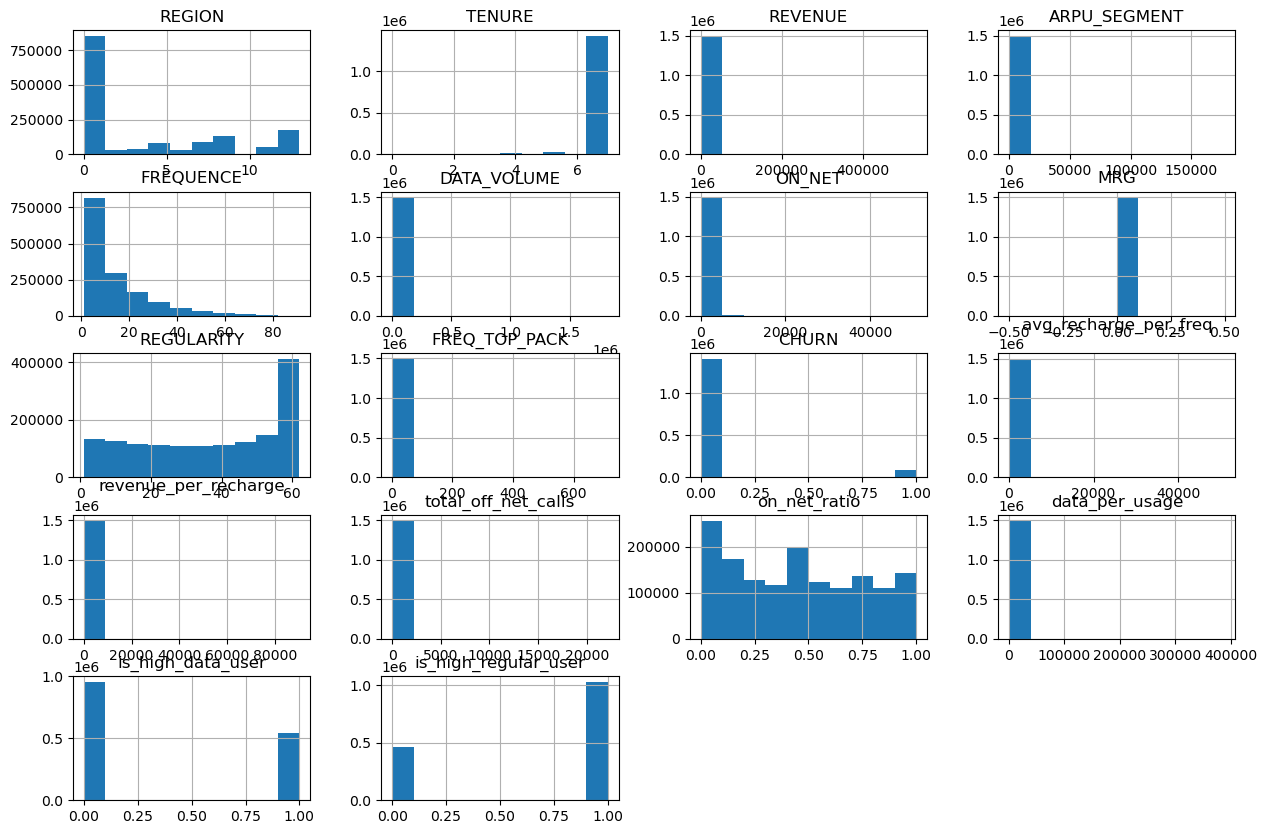

In [20]:
## checking for outliers
df.hist(figsize = (15,10));

In [21]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['CHURN'])  # Remove target variable
y = df['CHURN']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [22]:
X_train_sample = X_train.sample(frac = 0.4, random_state=20)
X_test_sample = X_test.sample(frac = 0.4, random_state=20)
y_train_sample = y_train.sample(frac = 0.4, random_state=20)
y_test_sample = y_test.sample(frac = 0.4, random_state=20)

In [23]:
import warnings
warnings.filterwarnings("ignore")

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, eval_metric='logloss'),
    "Logistic Regression":LogisticRegression(max_iter= 100)
    
}

for name, model in models.items():
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test_sample)
    acc = accuracy_score(y_test_sample, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.9371
Gradient Boosting Accuracy: 0.9428
XGBoost Accuracy: 0.9430
Logistic Regression Accuracy: 0.9415


In [24]:
# Train using XGBoost 
model = XGBClassifier(n_estimators=100, eval_metric='logloss')


In [25]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")

Model Accuracy: 0.943


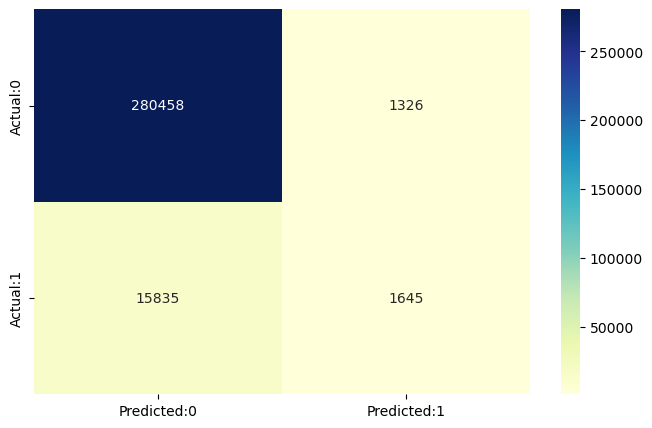

In [30]:
from sklearn.metrics import confusion_matrix
## confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "Predicted:1"], index = ["Actual:0", "Actual:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");

In [31]:
from sklearn.metrics import classification_report

In [34]:
C_Report = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n', C_Report)

Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.09      0.16     17480
           0       0.95      1.00      0.97    281784

    accuracy                           0.94    299264
   macro avg       0.75      0.54      0.57    299264
weighted avg       0.92      0.94      0.92    299264



## saving the model

In [36]:
import pickle
filename = "churn_model.pkl"
pickle.dump(model,open(filename, "wb"))# write binary = wb

In [37]:
X_train.columns

Index(['REGION', 'TENURE', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'MRG', 'REGULARITY', 'FREQ_TOP_PACK',
       'avg_recharge_per_freq', 'revenue_per_recharge', 'total_off_net_calls',
       'on_net_ratio', 'data_per_usage', 'is_high_data_user',
       'is_high_regular_user'],
      dtype='object')

In [42]:
df["REGION"].unique()

array([ 2,  0,  7, 11,  4, 12,  9,  6,  3,  1, 13,  8, 10,  5])